In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from pprint import pprint
%matplotlib inline

In [2]:
def gauss_noise(arr, mean=0.0, var=1):
    return arr + np.random.normal(mean, np.sqrt(var), arr.shape)

In [3]:
def qplt(img, pos, title='NEW'):
    plt.subplot(pos), plt.imshow(img, cmap='gray'), plt.title(title)

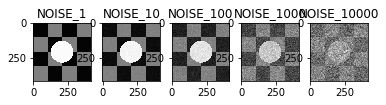

Classes are: [0 1 2]


In [4]:
img = cv2.imread('img/test1.bmp')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lables = gray_image // 127
img2 = gauss_noise(gray_image, var=100)

k = 5
noisy = [gauss_noise(gray_image, var=10 ** i) for i in range(k)]

[qplt(img, 100 + 10*k + i+1, 'NOISE_' + str(10 ** i)) for i, img in enumerate(noisy)]

plt.show()
classes = np.unique(lables)
print('Classes are:', classes)

# Navie Bayes

In [5]:
def naive_bayes_train(arr, target):
    class_info = {}
    for c in classes:
        res = []
        [[res.append(arr[i][j]) for j, v in enumerate(l) if v ==  c] for i, l in enumerate(target)]
        res_mean = np.mean(res)
        res_var = np.var(res)
        res_prob = len(res)/len(target)
        class_info[c] = (res_mean, res_var, res_prob)
    return class_info

In [6]:
test = [naive_bayes_train(noisy[i], lables) for i in range(k)]

In [7]:
def pdf_gauss(mean, var):
    return lambda x : 1/(np.sqrt(var*2*np.pi))*np.exp(-0.5/var*np.power(x-mean,2))

In [8]:
def naive_bayes_test(arr, test_info):
    G = [pdf_gauss(v[0], v[1]) for v in test_info.values()]
    p = [[np.argmax([v[2] * G[k](a)  for k, v in test_info.items()]) for a in ar] for ar in arr]
    return p
predict = [naive_bayes_test(noisy[i], test[i]) for i in range(k)]

### Plot Result

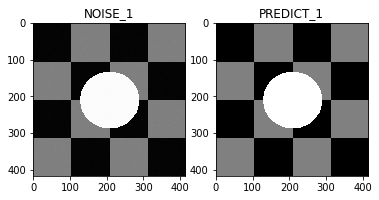

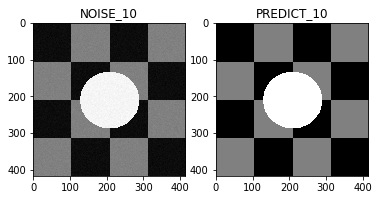

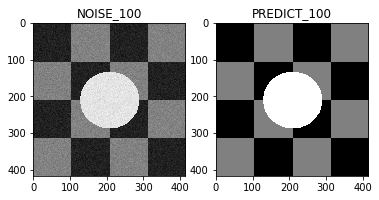

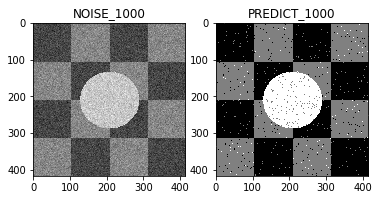

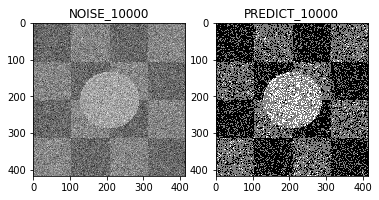

In [9]:
f = [(plt.subplot(121), plt.imshow(noisy[i], cmap='gray'), plt.title('NOISE_'+str(10 ** i)),
 plt.subplot(122), plt.imshow(predict[i], cmap='gray'), plt.title('PREDICT_' + str(10 ** i)),
 plt.show()) for i in range(k)]


# Markov Random Field

in this section we fouced on solving the problem by using markov random field
This scenario works with two factor one is the use of intensity of pixel and the other is the use of neighbours values or lables I mean predicted lables